In [1]:
#prepocessing data
# Import pustaka yang diperlukan
import pandas as pd
import numpy as np

# Membaca dataset
file_path = 'financial_risk_assessment.csv'  # Ganti dengan path dataset Anda
dataset = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dataset
print("Dataset Awal:")
display(dataset.head())

# Informasi umum dataset
print("\nInformasi Dataset:")
dataset.info()



Dataset Awal:


,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low



Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit Score           12750 non-null  float64
 6   Loan Amount            12750 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           12750 non-null  float64
 13  Number of Dependents   12750 non-null  float64
 14  City                   15000 non-n

In [2]:
# Menghitung jumlah nilai yang hilang (NaN)
print("\nJumlah nilai yang hilang per kolom:")
print(dataset.isnull().sum())

# Menghitung jumlah nilai nol per kolom (hanya untuk kolom numerik)
print("\nJumlah nilai nol per kolom (numerik):")
print((dataset == 0).sum(numeric_only=True))





Jumlah nilai yang hilang per kolom:
Age                         0
Gender                      0
Education Level             0
Marital Status              0
Income                   2250
Credit Score             2250
Loan Amount              2250
Loan Purpose                0
Employment Status           0
Years at Current Job        0
Payment History             0
Debt-to-Income Ratio        0
Assets Value             2250
Number of Dependents     2250
City                        0
State                       0
Country                     0
Previous Defaults        2250
Marital Status Change       0
Risk Rating                 0
dtype: int64

Jumlah nilai nol per kolom (numerik):
Age                         0
Gender                      0
Education Level             0
Marital Status              0
Income                      0
Credit Score                0
Loan Amount                 0
Loan Purpose                0
Employment Status           0
Years at Current Job      727
Payment His

In [3]:
# Penanganan nilai kosong (NaN) untuk kolom numerik
columns_with_nan = ['Income', 'Credit Score', 'Loan Amount', 'Assets Value', 'Number of Dependents', 'Previous Defaults']

for column in columns_with_nan:
    if column in dataset.columns:
        median_value = dataset[column].median()
        dataset[column] = dataset[column].fillna(median_value)  # Penugasan langsung
        print(f"Nilai kosong di kolom '{column}' telah diisi dengan median: {median_value}")

# Penanganan nilai nol
columns_with_zeros = ['Previous Defaults', 'Marital Status Change']

for column in columns_with_zeros:
    if column in dataset.columns:
        median_value = dataset[column].median()
        dataset[column] = dataset[column].replace(0, median_value)  # Penugasan langsung
        print(f"Nilai nol di kolom '{column}' telah diganti dengan median: {median_value}")


Nilai kosong di kolom 'Income' telah diisi dengan median: 69773.0
Nilai kosong di kolom 'Credit Score' telah diisi dengan median: 699.0
Nilai kosong di kolom 'Loan Amount' telah diisi dengan median: 27544.0
Nilai kosong di kolom 'Assets Value' telah diisi dengan median: 159362.0
Nilai kosong di kolom 'Number of Dependents' telah diisi dengan median: 2.0
Nilai kosong di kolom 'Previous Defaults' telah diisi dengan median: 2.0
Nilai nol di kolom 'Previous Defaults' telah diganti dengan median: 2.0
Nilai nol di kolom 'Marital Status Change' telah diganti dengan median: 1.0


In [4]:
# Menampilkan dataset setelah dibersihkan
print("\nDataset Setelah Preprocessing:")
display(dataset.head())

# Menyimpan dataset yang sudah bersih ke file Excel
cleaned_file_path = 'cleaned_dataset.xlsx'
dataset.to_excel(cleaned_file_path, index=False)
print(f"\nDataset bersih telah disimpan ke {cleaned_file_path}")



Dataset Setelah Preprocessing:


,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,69773.0,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,2.0,New Heather,IL,Namibia,3.0,1,Low



Dataset bersih telah disimpan ke cleaned_dataset.xlsx


In [5]:
# Import pustaka yang diperlukan
import pandas as pd

# Membaca dataset
file_path = 'cleaned_dataset.xlsx'  # Ganti dengan path dataset Anda
dataset = pd.read_excel(file_path)

# Menampilkan beberapa baris pertama dataset
print("Dataset Awal (5 baris pertama):")
display(dataset.head())

# Informasi umum dataset
print("\nInformasi Dataset:")
dataset.info()

# Statistik deskriptif untuk melihat gambaran data numerik
print("\nStatistik Deskriptif (Kolom Numerik):")
display(dataset.describe())

# Statistik deskriptif untuk kolom kategorikal
print("\nStatistik Deskriptif (Kolom Kategorikal):")
display(dataset.describe(include=[object]))



Dataset Awal (5 baris pertama):


,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799,688,45713,Business,Unemployed,19,Poor,0.154313,120228,0,Port Elizabeth,AS,Cyprus,2,2,Low
1,57,Female,Bachelor's,Widowed,69773,690,33835,Auto,Employed,6,Fair,0.148920,55849,0,North Catherine,OH,Turkmenistan,3,2,Medium
2,21,Non-binary,Master's,Single,55687,600,36623,Home,Employed,8,Fair,0.362398,180700,3,South Scott,OK,Luxembourg,3,2,Medium
3,59,Male,Bachelor's,Single,26508,622,26541,Personal,Unemployed,2,Excellent,0.454964,157319,3,Robinhaven,PR,Uganda,4,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427,766,36528,Personal,Unemployed,10,Fair,0.143242,287140,2,New Heather,IL,Namibia,3,1,Low



Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 15000 non-null  int64  
 5   Credit Score           15000 non-null  int64  
 6   Loan Amount            15000 non-null  int64  
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           15000 non-null  int64  
 13  Number of Dependents   15000 non-null  int64  
 14  City                   15000 non-n

,Age,Income,Credit Score,Loan Amount,Years at Current Job,Debt-to-Income Ratio,Assets Value,Number of Dependents,Previous Defaults,Marital Status Change
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,43.452667,69909.338733,699.092733,27464.109267,9.476267,0.350438,159684.572600,2.022533,2.336400,1.330333
std,14.910732,26887.437667,52.762664,11939.231816,5.769707,0.143919,74030.893394,1.301181,0.952731,0.470349
min,18.000000,20005.000000,600.000000,5000.000000,0.000000,0.100004,20055.000000,0.000000,1.000000,1.000000
25%,31.000000,48390.000000,659.000000,18235.500000,4.000000,0.227386,103201.000000,1.000000,2.000000,1.000000
50%,43.000000,69773.000000,699.000000,27544.000000,9.000000,0.350754,159362.000000,2.000000,2.000000,1.000000
75%,56.000000,91262.500000,739.250000,36518.750000,15.000000,0.476095,215674.250000,3.000000,3.000000,2.000000
max,69.000000,119997.000000,799.000000,49998.000000,19.000000,0.599970,299999.000000,4.000000,4.000000,2.000000



Statistik Deskriptif (Kolom Kategorikal):


,Gender,Education Level,Marital Status,Loan Purpose,Employment Status,Payment History,City,State,Country,Risk Rating
count,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000
unique,3,4,4,4,3,4,10614,59,243,3
top,Non-binary,Bachelor's,Widowed,Personal,Employed,Good,East Michael,CO,Congo,Low
freq,5059,3829,3893,3771,5026,3822,19,282,124,9000


In [6]:
# Import pustaka yang diperlukan
import matplotlib.pyplot as plt
import seaborn as sns

# Menampilkan jumlah data unik untuk kolom kategorikal
print("\nJumlah Nilai Unik untuk Kolom Kategorikal:")
for col in dataset.select_dtypes(include=['object']).columns:
    print(f"{col}: {dataset[col].nunique()} unique values")

# Menampilkan distribusi data numerik
print("\nDistribusi Data Numerik:")
display(dataset.describe())





Jumlah Nilai Unik untuk Kolom Kategorikal:
Gender: 3 unique values
Education Level: 4 unique values
Marital Status: 4 unique values
Loan Purpose: 4 unique values
Employment Status: 3 unique values
Payment History: 4 unique values
City: 10614 unique values
State: 59 unique values
Country: 243 unique values
Risk Rating: 3 unique values

Distribusi Data Numerik:


,Age,Income,Credit Score,Loan Amount,Years at Current Job,Debt-to-Income Ratio,Assets Value,Number of Dependents,Previous Defaults,Marital Status Change
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,43.452667,69909.338733,699.092733,27464.109267,9.476267,0.350438,159684.572600,2.022533,2.336400,1.330333
std,14.910732,26887.437667,52.762664,11939.231816,5.769707,0.143919,74030.893394,1.301181,0.952731,0.470349
min,18.000000,20005.000000,600.000000,5000.000000,0.000000,0.100004,20055.000000,0.000000,1.000000,1.000000
25%,31.000000,48390.000000,659.000000,18235.500000,4.000000,0.227386,103201.000000,1.000000,2.000000,1.000000
50%,43.000000,69773.000000,699.000000,27544.000000,9.000000,0.350754,159362.000000,2.000000,2.000000,1.000000
75%,56.000000,91262.500000,739.250000,36518.750000,15.000000,0.476095,215674.250000,3.000000,3.000000,2.000000
max,69.000000,119997.000000,799.000000,49998.000000,19.000000,0.599970,299999.000000,4.000000,4.000000,2.000000


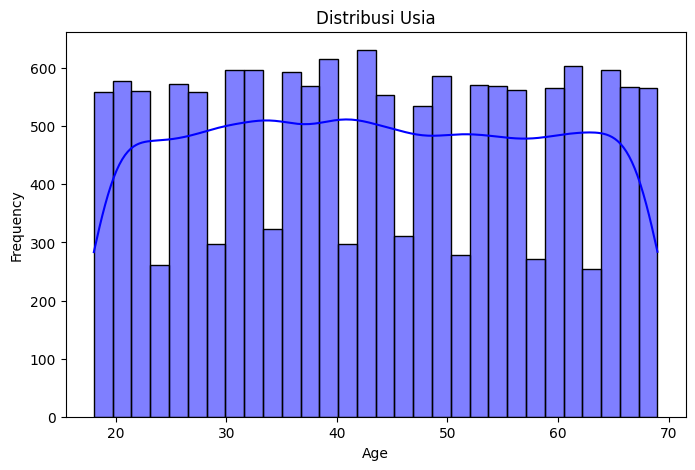

In [7]:
# Visualisasi Distribusi Usia
plt.figure(figsize=(8, 5))
sns.histplot(dataset['Age'], bins=30, kde=True, color='blue')
plt.title('Distribusi Usia')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()




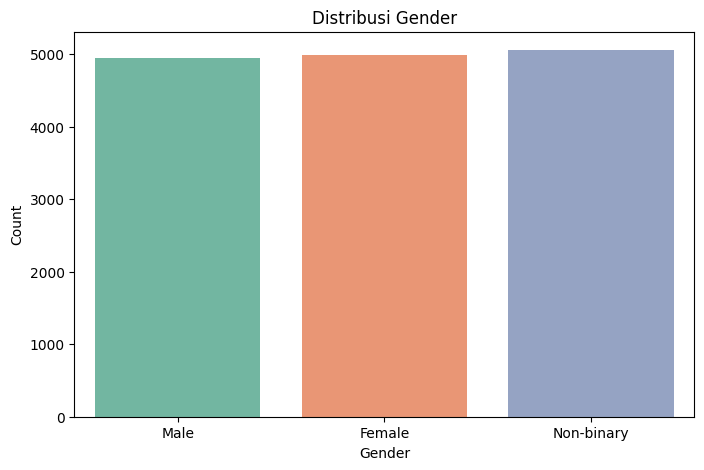

In [8]:
# Visualisasi Gender
plt.figure(figsize=(8, 5))
sns.countplot(data=dataset, x='Gender', hue='Gender', palette='Set2', legend=False)
plt.title('Distribusi Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()




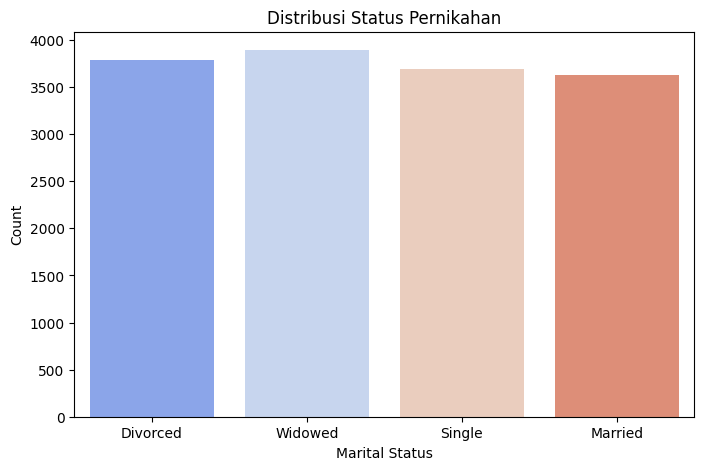

In [9]:
# Visualisasi Status Pernikahan
plt.figure(figsize=(8, 5))
sns.countplot(data=dataset, x='Marital Status', hue='Marital Status', palette='coolwarm', legend=False)
plt.title('Distribusi Status Pernikahan')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()



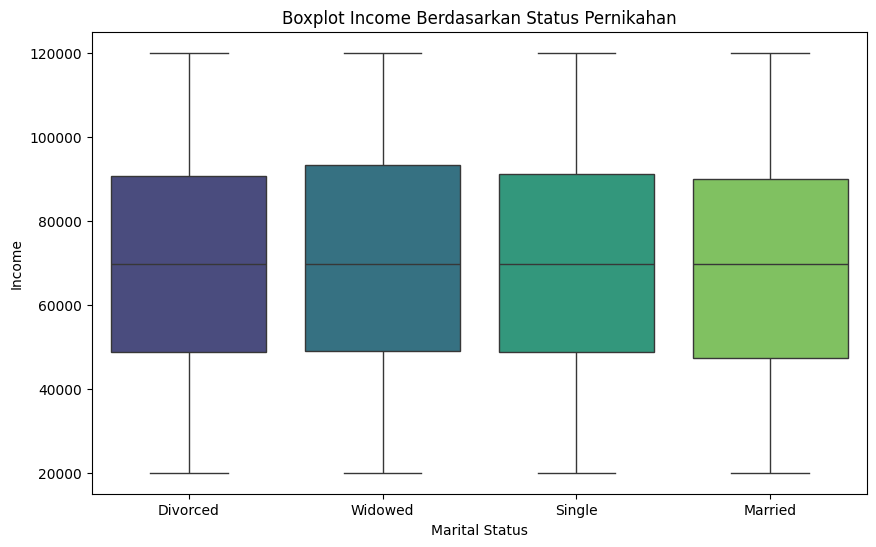

In [10]:
# Boxplot Income berdasarkan Status Pernikahan
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='Marital Status', y='Income', hue='Marital Status', palette='viridis', legend=False)
plt.title('Boxplot Income Berdasarkan Status Pernikahan')
plt.xlabel('Marital Status')
plt.ylabel('Income')
plt.show()

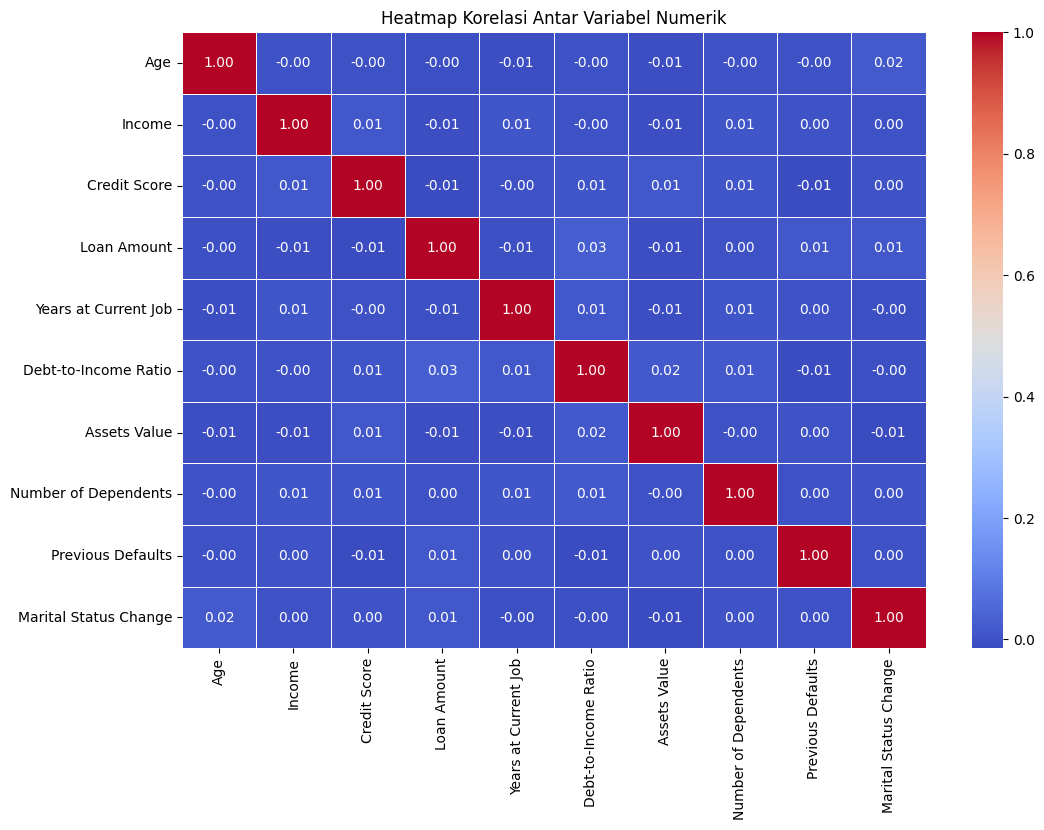

In [11]:
# Korelasi antar variabel numerik
# Memilih hanya kolom numerik untuk perhitungan korelasi
numerical_columns = dataset.select_dtypes(include=['int64', 'float64'])

# Korelasi antar variabel numerik
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_columns.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()




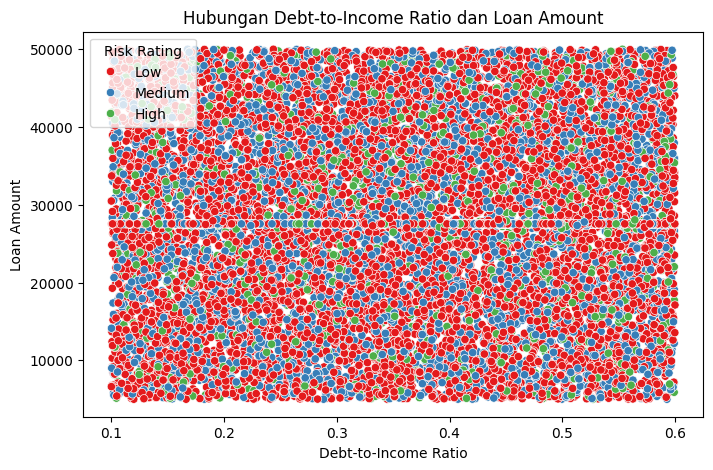

In [12]:
# Scatterplot antara Debt-to-Income Ratio dan Loan Amount
plt.figure(figsize=(8, 5))
sns.scatterplot(data=dataset, x='Debt-to-Income Ratio', y='Loan Amount', hue='Risk Rating', palette='Set1')
plt.title('Hubungan Debt-to-Income Ratio dan Loan Amount')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Loan Amount')
plt.legend(title='Risk Rating')
plt.show()



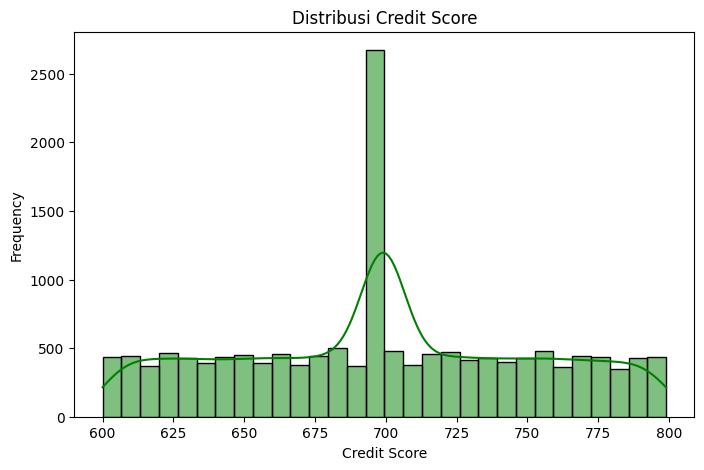

In [13]:
# Distribusi Credit Score
plt.figure(figsize=(8, 5))
sns.histplot(dataset['Credit Score'], bins=30, kde=True, color='green')
plt.title('Distribusi Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()